In [1]:
pip install shap lime scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.1/457.1 kB 1.9 MB/s eta 0:00:0000:0100:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=2b7b326ffdba505dbbf0e1b1526ecb463b49fedbaed2114b12a1ffd84a3bfca9
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


# SHAP and LIME explainers

In [3]:
# Import necessary libraries
import numpy as np
import shap
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [4]:
print(X_test.shape, X_train.shape)

(4128, 8) (16512, 8)


In [5]:
# Initialize SHAP explainer with 
explainer_shap = shap.Explainer(model, X_train)

# Explain prediction using SHAP
shap_values = explainer_shap(X_test, check_additivity=False )


100%|===================| 4116/4128 [05:00<00:00]        

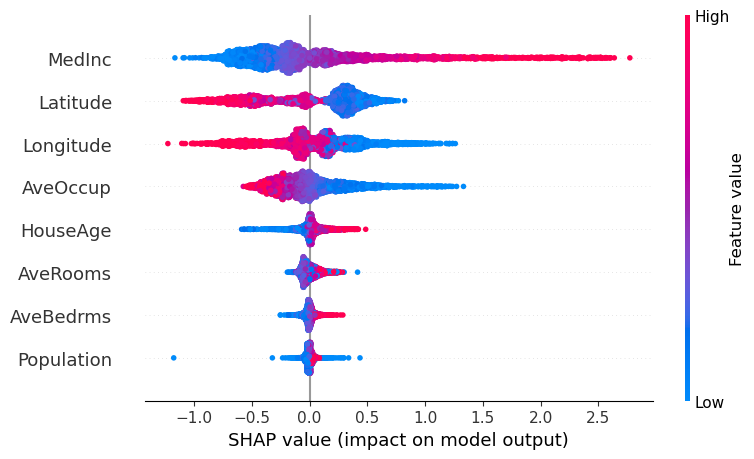

In [6]:
# Visualize SHAP values
shap.summary_plot(shap_values, features=X_test, feature_names=data.feature_names)

# Ridge regression, Random Forest regression, and XGBoost regression for prediction

In [29]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
print("Ridge Regression RMSE:", ridge_rmse)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Random Forest Regression RMSE:", rf_rmse)

# XGBoost Regression
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train, y_train)
xgb_pred = xg_reg.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
print("XGBoost Regression RMSE:", xgb_rmse)

Ridge Regression RMSE: 0.7455222779992692
Random Forest Regression RMSE: 0.5053399773665033
XGBoost Regression RMSE: 0.5643662949958684


In [1]:
# Assuming 'network' is your trained model
from cred import CRED

# Extract rules
cred_extractor = CRED(network, train_data)
rules = cred_extractor.extract_rules()

# Display rules
for rule in rules:
    print(rule)


ImportError: cannot import name 'CRED' from 'cred' (/Users/mac/anaconda3/lib/python3.11/site-packages/cred/__init__.py)